# Make predictions in production
This document shows how to make predictions by using the trained model. The metric objective is F1_score and a general accuracy for all classes. There are two types of F1_score, macro and weighted, weighted considers the classes unbalance and the other does not.

The model is stored in Hugging Face, use the following link to download it:


This model should be downloaded and saved in folder 'models' as 'model_fruits.h5'.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
# (height, width, channels)
input_shape = (224, 224, 3)
folder_models = '../models'
test_path = '../test'
batch_size = 8

In [29]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False           # IMPORTANT: Set False for evaluation purposes
)

Found 9 images belonging to 3 classes.


In [37]:
# Load the model
model = load_model(os.path.join(folder_models, 'sparse_model_v2.h5'))

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
predicted_probs = np.max(predictions, axis=1)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Mapping: indexes → class names
class_indexes = test_generator.class_indices
classes = list(class_indexes.keys())

2/2 [==============================] - 2s 91ms/step


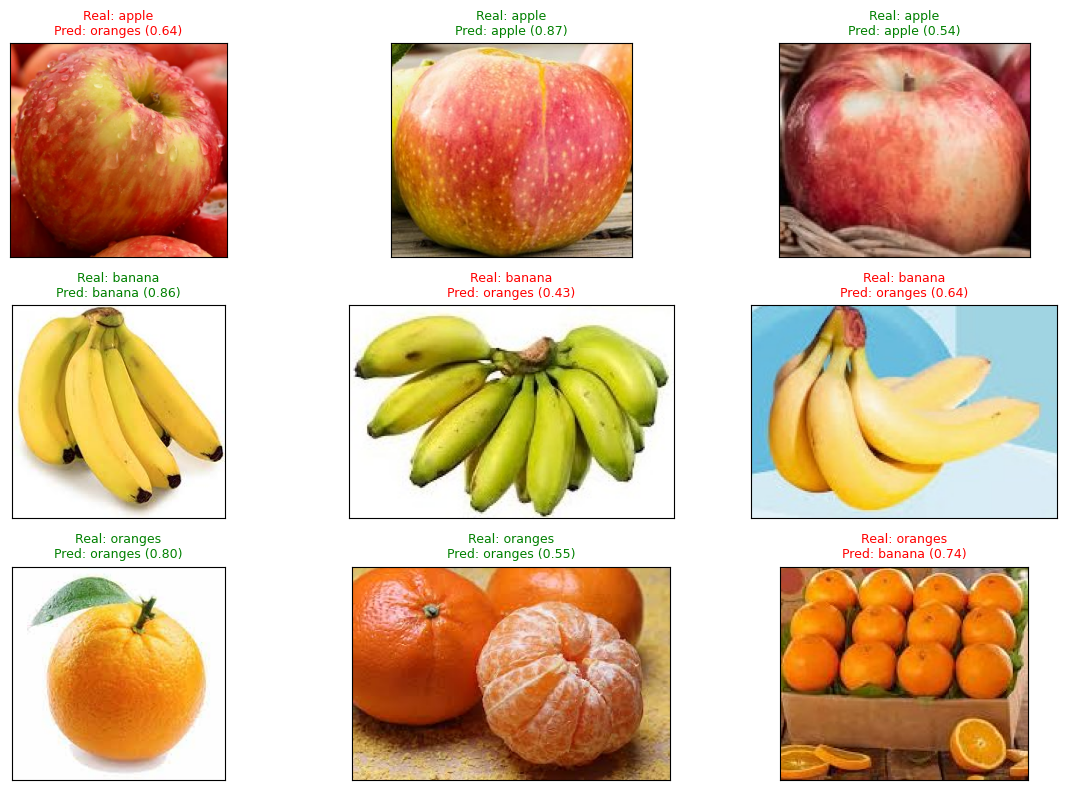

In [38]:
filenames = test_generator.filenames
true_labels = test_generator.classes
true_class_names = [classes[i] for i in true_labels]
pred_class_names = [classes[i] for i in predicted_classes]

nrows, ncols = 3, 3
num_images = nrows * ncols

figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
for ax, img_path, label, pred, prob in zip(
        axes.ravel(),
        filenames[:num_images],
        true_class_names[:num_images],
        pred_class_names[:num_images],
        predicted_probs[:num_images]):

    img = plt.imread(os.path.join(test_path, img_path))
    ax.imshow(img)
    color = "green" if label == pred else "red"
    ax.set_title(f"Real: {label}\nPred: {pred} ({prob:.2f})",
                 fontsize=9, color=color)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [33]:
print("===== Classification Report =====")
print(classification_report(
    y_true, y_pred,
    target_names=list(test_generator.class_indices.keys()),
    digits=3
))

===== Classification Report =====
              precision    recall  f1-score   support

       apple      1.000     0.667     0.800         3
      banana      0.500     0.333     0.400         3
     oranges      0.400     0.667     0.500         3

    accuracy                          0.556         9
   macro avg      0.633     0.556     0.567         9
weighted avg      0.633     0.556     0.567         9



In [ ]:
acc = accuracy_score(y_true, y_pred)
print(f"General Accuracy: {acc:.3f}")

Accuracy general: 0.556


In [ ]:
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"F1 macro (simple): {f1_macro:.3f}")
print(f"F1 weighted: {f1_weighted:.3f}")

F1 macro: 0.567
F1 weighted: 0.567


## Conclusions
The MAE (Mean Absolute Error) is acceptable. The performance of the model is related to the dataset quality, pretrained model used (Resnet50), convolutional neuronal network design and batch size of training. Due to limitations in computing power, this model could not be trained better.

The performance of the model can be improved by:
1. Dividing the target age, and training a differente model for each group, for example, from 1 to 10, 11 to 20, 21 to 30 and so on.
2. Dividing the dataset by ethnic and training a differente model for each group, for example, white people, black people, asian people, indian people and latin people.
3. Combining steps 1 and 2.